### Prueba a realizar a partir del ejemplo de la Concesión de créditos, uno similar con los datos del Titanic, teniendo en consideración los pasajeros que sobrevivieron (o no) en función de su edad y Ticket de billete.

In [17]:
#------------------------------------------------------------------------------
# IMPORTAMOS LAS LIBRERÍAS
#------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

#------------------------------------------------------------------------------
# CARGAMOS LOS DATOS
#------------------------------------------------------------------------------
pasajeros = pd.read_csv( "titanic.csv" )

print (type(pasajeros))
pasajeros


<class 'pandas.core.frame.DataFrame'>


,IdPasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,Hermanos_familiares,Padres_hijos,Ticket,Tarifa,Cabina,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",hombre,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mujer,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mujer,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",hombre,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",hombre,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",mujer,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",mujer,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",hombre,26.0,0,0,111369,30.0000,C148,C


In [18]:
supervivientes = pasajeros[ pasajeros[ "Sobrevivió" ] == 1 ]
fallecidos = pasajeros[ pasajeros[ "Sobrevivió" ] == 0 ]

supervivientes, fallecidos

(     IdPasajero  Sobrevivió  Clase  \
 1             2           1      1   
 2             3           1      3   
 3             4           1      1   
 8             9           1      3   
 9            10           1      2   
 ..          ...         ...    ...   
 875         876           1      3   
 879         880           1      1   
 880         881           1      2   
 887         888           1      1   
 889         890           1      1   
 
                                                 Nombre    Sexo  Edad  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...   mujer  38.0   
 2                               Heikkinen, Miss. Laina   mujer  26.0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   mujer  35.0   
 8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   mujer  27.0   
 9                  Nasser, Mrs. Nicholas (Adele Achem)   mujer  14.0   
 ..                                                 ...     ...   ...   
 875               

Para lo que se nos pide, eliminamos la columna "Nombre" y "Ticket" ya que muestran valores discretos y para el preprocesado supondrían un problema. También eliminamos "cabina" ya que contiene un monton de nulos y no resulta relevante en este modelo.

In [19]:
pasajeros = pasajeros.drop(columns=["Nombre", "Ticket", "Cabina"])



# supervivientes = pasajeros[ pasajeros[ "Sobrevivió" ] == 1 ]
# fallecidos = pasajeros[ pasajeros[ "Sobrevivió" ] == 0 ]

supervivientes, fallecidos

(     IdPasajero  Sobrevivió  Clase  \
 1             2           1      1   
 2             3           1      3   
 3             4           1      1   
 8             9           1      3   
 9            10           1      2   
 ..          ...         ...    ...   
 875         876           1      3   
 879         880           1      1   
 880         881           1      2   
 887         888           1      1   
 889         890           1      1   
 
                                                 Nombre    Sexo  Edad  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...   mujer  38.0   
 2                               Heikkinen, Miss. Laina   mujer  26.0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   mujer  35.0   
 8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   mujer  27.0   
 9                  Nasser, Mrs. Nicholas (Adele Achem)   mujer  14.0   
 ..                                                 ...     ...   ...   
 875               

Para poder hacer correctamente el escalado, convertimos la columna "Sexo" y "Embarcado" a numérica con onehotEncoder y eliminamos la columna "sexo" y "Embarcado"

In [24]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
sex_catOHE = cat_encoder.fit_transform(pasajeros[["Sexo","Embarcado"]])
sex_catOHE


,Sexo_hombre,Sexo_mujer,Embarcado_C,Embarcado_Q,Embarcado_S
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
886,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0
889,1.0,0.0,1.0,0.0,0.0


Concatenamos los dataframes:

In [64]:
pasajeros_cat = pd.concat([pasajeros.drop(columns=["Sexo", "Embarcado"]), sex_catOHE], axis=1)
pasajeros_cat
pasajeros_cat["Clase"].value_counts()

pasajeros_cat["Edad"].value_counts()
df_filtered = pasajeros[(pasajeros['Edad'] == 0)][['Sobrevivió']].value_counts()
df_filtered


Sobrevivió
0             125
1              52
Name: count, dtype: int64

Hay 177 registros con edad 0, probablemente porque la edad de la victima era desconocida. Eliminamos los 177 registros.

In [68]:

pasajeros_cat2 = pasajeros_cat.drop(pasajeros_cat[pasajeros_cat['Edad'] == 0].index)
print (pasajeros_cat["Edad"].value_counts())
pasajeros_cat2


Edad
0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64


,IdPasajero,Sobrevivió,Clase,Edad,Hermanos_familiares,Padres_hijos,Tarifa,Sexo_hombre,Sexo_mujer,Embarcado_C,Embarcado_Q,Embarcado_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,1.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7925.0000,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29125.0000,0.0,1.0,0.0,1.0,0.0
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,1.0,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0


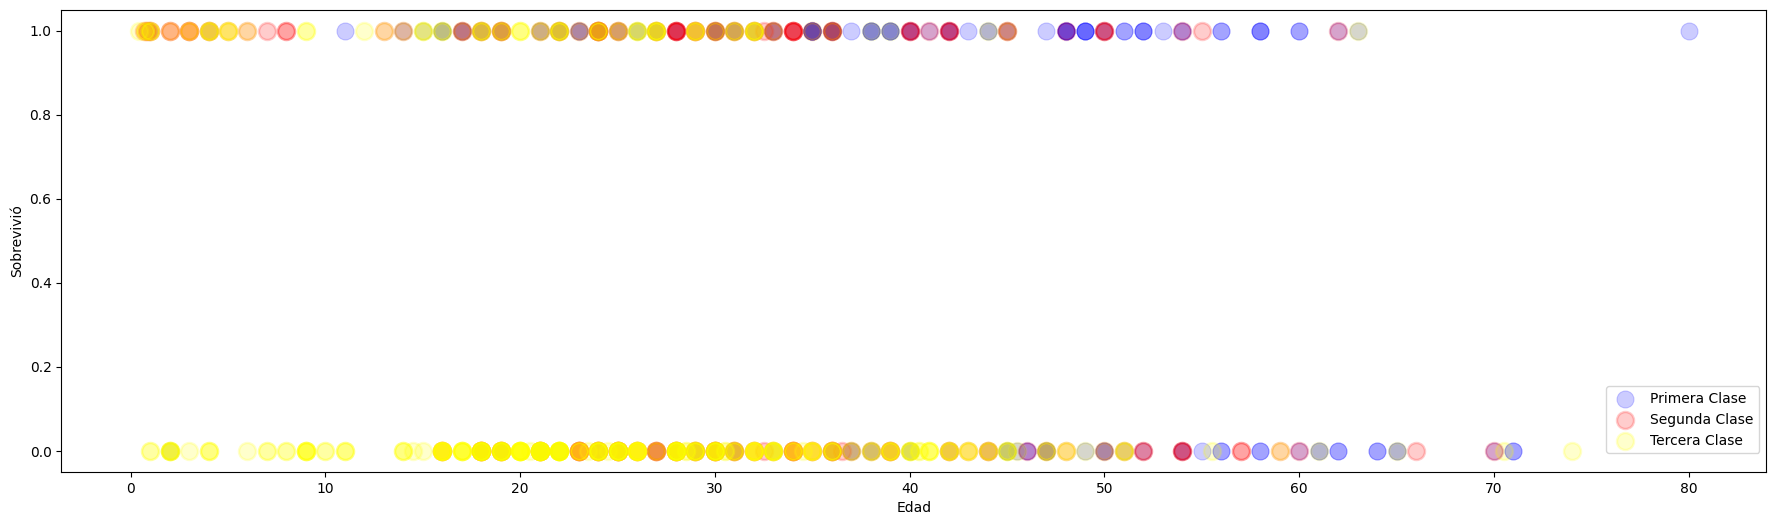

In [69]:
clase1 = pasajeros_cat2[pasajeros_cat2["Clase"]==1]
clase2 = pasajeros_cat2[pasajeros_cat2["Clase"]==2]
clase3 = pasajeros_cat2[pasajeros_cat2["Clase"]==3]

clase1["Sobrevivió"].value_counts()
clase2["Sobrevivió"].value_counts()
clase3["Sobrevivió"].value_counts() 

#------------------------------------------------------------------------------
# GENERAMOS LAS GRÁFICA ASOCIADA
#------------------------------------------------------------------------------



plt.figure(figsize=(22, 6))
plt.scatter( clase1[ "Edad" ], clase1[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "blue",
            linewidths = 0.75,
            alpha=0.2,
            label = "Primera Clase")

plt.scatter( clase2[ "Edad" ], clase2[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "red",
            linewidths = 1.75,
            alpha=0.2,
            label = "Segunda Clase")

plt.scatter( clase3[ "Edad" ], clase3[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "yellow",
            linewidths = 1.75,
            alpha=0.2,
            label = "Tercera Clase")


plt.ylabel( "Sobrevivió" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.2 ) )
plt.show()

Vemos la distribución de fallecidos y supervivientes según su edad y con el código de colores acumulativo de primera, segunda y tercera clase.

Ahora que tenemos todos los campos necesarios con valores numéricos, escalamos los resultados.

In [74]:
#------------------------------------------------------------------------------
# PREPARAMOS LOS DATOS ESCALÁNDOLOS
#------------------------------------------------------------------------------

objetivo = pasajeros_cat2[ "Sobrevivió" ]

escalador = preprocessing.MinMaxScaler()
predict = escalador.fit_transform( pasajeros_cat2[["Edad", "Clase"]] )
predict, objetivo

(array([[0.27117366, 1.        ],
        [0.4722292 , 0.        ],
        [0.32143755, 1.        ],
        ...,
        [0.23347575, 0.        ],
        [0.32143755, 0.        ],
        [0.39683338, 1.        ]]),
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Sobrevivió, Length: 714, dtype: int64)

Creamos el modelo KNN

In [75]:
#------------------------------------------------------------------------------
#   CREAMOS EL MODELO KNN
#------------------------------------------------------------------------------
#   n_neighbors     número de vecinos                 (int).                             Por defecto es 5  , se suele utilizar la raiz del nº de instancias (raiz 200-> 14)
#   weights         función de peso de la predicción  (uniform, distance).               Por defecto es uniform
#   algorithm       algoritmo de cálculo              (ball_tree, kd_tree, brute, auto). Por defecto es auto
#   leaf_size       tamaño de hoja de cálculo         (int).                             Por defecto es 30
#   p               párametro de potencia             (int).                             Por defecto es 2
#   metric          métrica sobre la distancia        ("minkowski", "precomputed").      Por defecto es "minkowski"
#   metric_params   argumentos adicionales            ("") .                             Por defecto es None
#   n_jobs          número de trabajos en paralelo    (int)                              Por defecto es None
#------------------------------------------------------------------------------
clasificador = KNeighborsClassifier(
    n_neighbors =25,            #utilizamos la raiz del numero de instancias para calcular los vecinos raiz de 714
    weights = "distance",        #cambiamos peso a "distance"
    algorithm = "brute",         #cambiamos algoritmo a "brute"
    leaf_size = 150,             #cambiamos tamaño de hoja a 150
    p = 3,                      #cambiamos parametro de potencia a su valor por defecto
    metric = "minkowski",
    n_jobs  = None
  )

clasificador.fit( predict, objetivo )

KNeighborsClassifier(algorithm='brute', leaf_size=150, n_neighbors=25, p=3,
                     weights='distance')

proporcionamos datos de un candidato

32 1
Petición de  [1]
Probabilidades por clase [[0. 1.]]


c:\Users\a_sal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


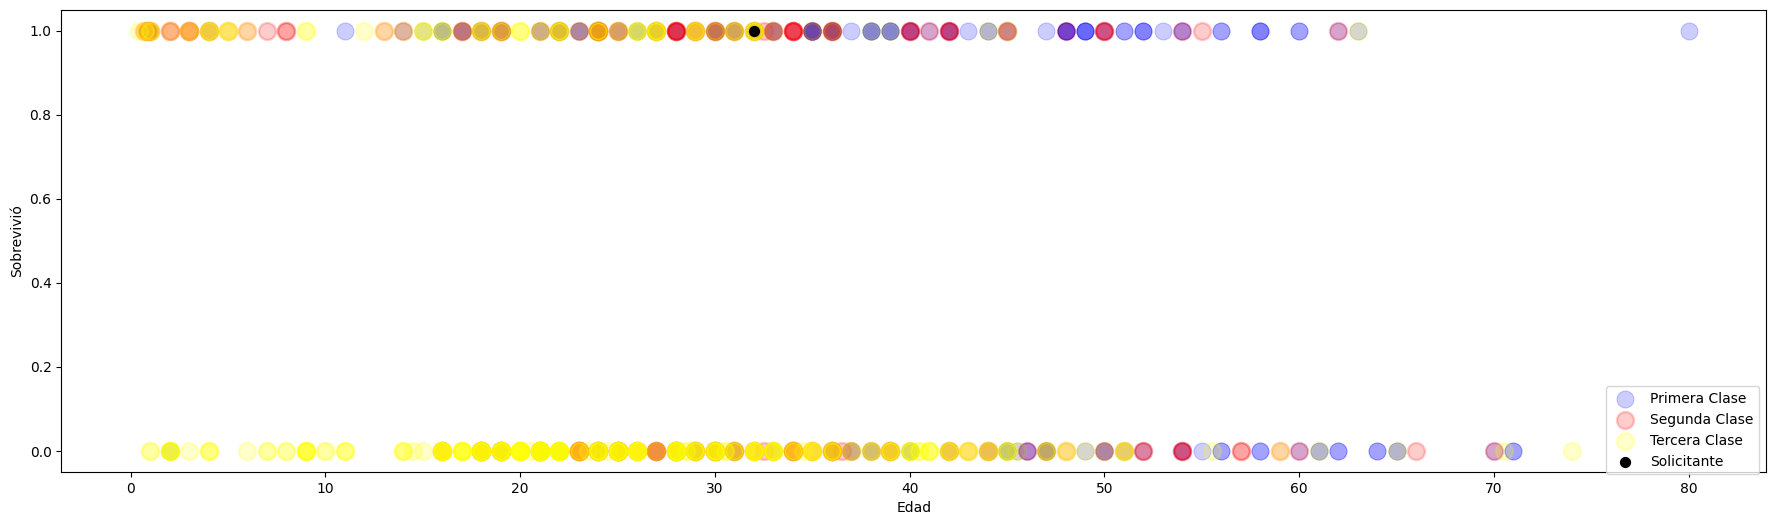

In [87]:
#------------------------------------------------------------------------------
# DEFINIMOS AHORA LOS DATOS DEL CANDIDATO
#------------------------------------------------------------------------------
Edad_CAN  = random.randint( 15, 60 )  
Clase_CAN = random.randint( 1, 3)  
print (Edad_CAN,Clase_CAN)

#------------------------------------------------------------------------------
# ESCALAMOS LOS DATOS DEL NUEVO SOLICITANTE
#------------------------------------------------------------------------------
#Escalar los datos del nuevo solicitante
candidato = escalador.transform( [ [ Edad_CAN, Clase_CAN ] ] )

#------------------------------------------------------------------------------
# CALCULAMOS CLASE Y PROBABILIDADES
#------------------------------------------------------------------------------
print( "Petición de ", clasificador.predict( candidato ) )
print( "Probabilidades por clase",
      clasificador.predict_proba( candidato ) )

#------------------------------------------------------------------------------
# GRÁFICO ASOCIADO
#------------------------------------------------------------------------------


plt.figure(figsize=(22, 6))
plt.scatter( clase1[ "Edad" ], clase1[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "blue",
            linewidths = 0.75,
            alpha=0.2,
            label = "Primera Clase")

plt.scatter( clase2[ "Edad" ], clase2[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "red",
            linewidths = 1.75,
            alpha=0.2,
            label = "Segunda Clase")

plt.scatter( clase3[ "Edad" ], clase3[ "Sobrevivió" ],
            marker = "o", #punto
            s = 150,
            color = "yellow",
            linewidths = 1.75,
            alpha=0.2,
            label = "Tercera Clase")

plt.scatter( Edad_CAN, clasificador.predict(candidato), marker = "o", s = 50, color = "black", label = "Solicitante" )

plt.ylabel( "Sobrevivió" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.2 ) )
plt.show()

